<img src = 'photos/spotify.jpg'>

# Introduction
Welcome to the Spotify Song Analysis Documentation! In this guide, we explore a fascinating dataset containing information about various songs available on Spotify. We will dive into the world of music, using data analytics and visualization techniques to uncover insights about song characteristics, artist influence, trends over time, and more. Whether you're a music enthusiast, data analyst, or curious learner, this documentation will provide you with a captivating journey through the data-driven exploration of music.

# Table of Contents
1. [Dataset Overview](#dataset_overview)
2. [Top Artists and Their Songs](#top-artists-and-their-songs)
3. [Energy and Danceability Relationship](#energy-and-danceability-relationship)
4. [Song Characteristics Distribution](#song-characteristics-distribution)
5. [Nationality Distribution and Points](#nationality-distribution-and-points)
6. [Continent-wise Song Characteristics](#continent-wise-song-characteristics)
7. [Correlation Matrix](#correlation-matrix)
8. [Song Characteristics Over Time](#song-characteristics-over-time)
9. [Artist and Nationality Points](#artist-and-nationalist-points)
10. [Song Characteristics vs. Artist Points](#song-characteristics-artist-points)
11. [Top Songs by Points](#top-songs-points)
12. [Summary](#summary)
13. [Additional Resources](#additional-resources)

# Dataset Overview <a id="dataset_overview"></a>

In [2]:
# import all dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# load the dataset
file_path = 'csv_files/Spotify_Dataset_V2.csv'
spotify_df = pd.read_csv(file_path, sep=';', encoding='utf-8')

# First 5 rows
spotify_df.head()

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
2,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...


In [4]:
# Basic information about dataset
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670171 entries, 0 to 670170
Data columns (total 20 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Rank                              670171 non-null  int64  
 1   Title                             670171 non-null  object 
 2   Artists                           670171 non-null  object 
 3   Date                              670171 non-null  object 
 4   Danceability                      670171 non-null  float64
 5   Energy                            670171 non-null  float64
 6   Loudness                          670171 non-null  float64
 7   Speechiness                       670171 non-null  float64
 8   Acousticness                      670171 non-null  float64
 9   Instrumentalness                  670171 non-null  float64
 10  Valence                           670171 non-null  float64
 11  # of Artist                       670171 non-null  o

In [5]:
# Check any null if there
spotify_df.isna().sum()

Rank                                0
Title                               0
Artists                             0
Date                                0
Danceability                        0
Energy                              0
Loudness                            0
Speechiness                         0
Acousticness                        0
Instrumentalness                    0
Valence                             0
# of Artist                         0
Artist (Ind.)                       0
# of Nationality                    0
Nationality                         0
Continent                           0
Points (Total)                      0
Points (Ind for each Artist/Nat)    0
id                                  0
Song URL                            0
dtype: int64

In [6]:
# Let's see the column names
spotify_df.columns

Index(['Rank', 'Title', 'Artists', 'Date', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Valence', '# of Artist', 'Artist (Ind.)', '# of Nationality',
       'Nationality', 'Continent', 'Points (Total)',
       'Points (Ind for each Artist/Nat)', 'id', 'Song URL'],
      dtype='object')

* Song Rank
* Title of the Song
* Artist Name
* Date
* Nationality of each artist
* Artist's Continent
* Unique Song ID
* URL Link to the Song

* Danceability: Describes how suitable a track is for dancing
* Energy: Represents a perceptual measure of intensity and activity. Energetic tracks feel fast, loud and noisy.
* Loudness: The overall loudness of a track in decibels (dB)
* Speechiness: Detects the presence of spoken words in a track.
* Acousticness: Describes whether a track uses only or primarily instruments that produce sound through acoustic means.
* Instrumentalness: Predicts whether a track contains no vocals.
* Valence: Describes the musical positiveness of a track


In [7]:
# Check the shape
spotify_df.shape

(670171, 20)

but but but as we can see something is not looking correct can you see it?

```yes, the loudness Column is showing data around -5000 db which is incorrect```

* A histogram peak around -5000 dB in the loudness distribution might be due to some incorrect or missing data values in your dataset. Such a low value of -5000 dB is not physically meaningful for loudness, as loudness values are typically measured in the range of -60 dB to 0 dB.

* In simpler terms, think of loudness as how "loud" a song is. A value of -5000 dB is way below the range of human hearing and doesn't make sense in the context of music. It's possible that there are some errors in the dataset or some data points are missing, leading to this unusual peak in the histogram.

* You should investigate the data cleaning process to identify and handle any incorrect or missing values in the loudness column before performing any analysis or visualization.


**Loudness range**

Ideally, loudness values for music should fall within a range that is perceptually meaningful and comfortable for human ears. The loudness of music is typically measured in decibels (dB), and the range can vary based on the context and genre of the music. Here are some general guidelines:

1. **Normal Range**: In most cases, the loudness of music falls within the range of -60 dB to 0 dB. This range encompasses the full spectrum of music genres, from quiet acoustic tracks to loud rock concerts.

2. **Quiet Music**: Quiet or soft music might have loudness values around -30 dB to -20 dB. This is suitable for genres like classical, jazz, and acoustic music.

3. **Moderate Volume**: Most popular music and recordings aim for a loudness between -20 dB and -10 dB. This ensures that the music is audible and enjoyable without being too overwhelming.

4. **Loud Music**: Genres like rock, pop, and electronic dance music (EDM) can have loudness values around -10 dB to 0 dB. These genres often have a more intense and energetic sound.

It's important to note that the loudness of music can vary based on the artist's intention, recording techniques, and the desired listening experience. Additionally, loudness can be influenced by the mastering process, where audio engineers adjust the overall volume and dynamics of a track to achieve a certain sound.

However, loudness values significantly below -60 dB or extremely high values are likely to be errors or outliers in the data. If you encounter values that fall outside the typical loudness range, it's advisable to investigate and correct them before performing any analysis or visualization on the data.

In [8]:
(spotify_df['Loudness']<-60).value_counts()

True     602264
False     67907
Name: Loudness, dtype: int64

## Clean the dataset

In [9]:
# Filter out rows with loudness values outside the valid range
valid_loudness_range = (-60, 0)
filtered_df = spotify_df[(spotify_df['Loudness'] >= valid_loudness_range[0]) & (spotify_df['Loudness'] <= valid_loudness_range[1])]

# Save the filtered dataset to a new CSV file (optional)
filtered_df.to_csv('csv_files/filtered_dataset.csv', index=False)

In [10]:
spotify_filtered = pd.read_csv('csv_files/filtered_dataset.csv')

In [11]:
# shape
spotify_filtered.shape

(67794, 20)

# Top Artists and Their Songs <a id="top-artists-and-their-songs"></a>
**Question:** Who are the top artists and what are their popular songs?

* **Columns:** 'Artists', 'Title', 'Points (Total)'
* **Plot:** Bar Plot showcasing the top N artists and their total points.

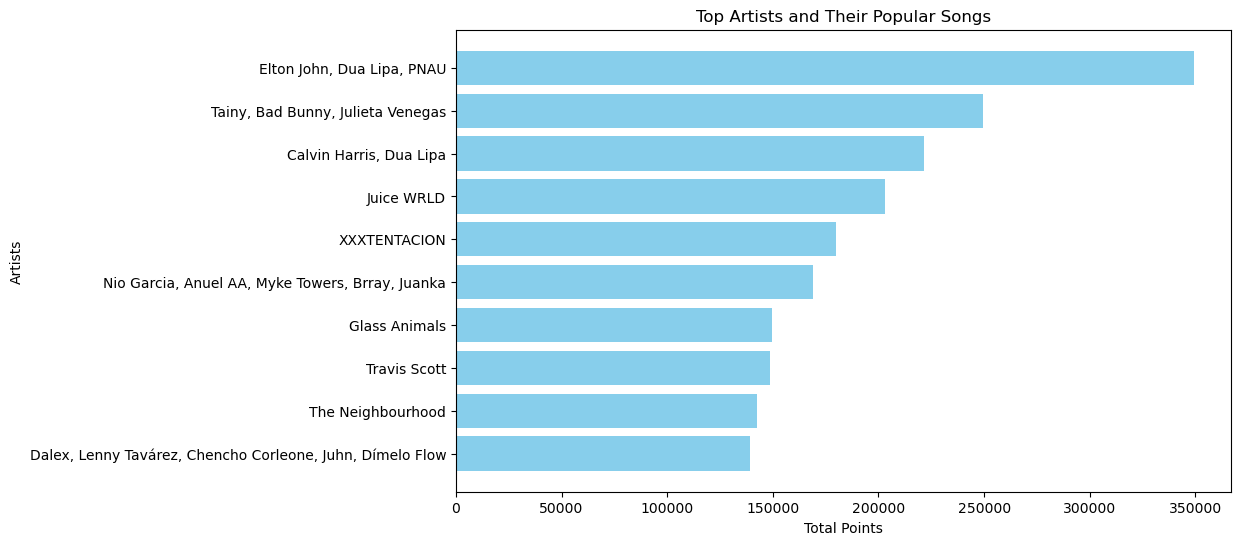

In [12]:
# Group by artists and calculate the total points for each artist
artist_points = spotify_filtered.groupby('Artists')['Points (Total)'].sum().sort_values(ascending=False)

# Choose the top N artists (e.g., top 10)
top_n = 10
top_artists = artist_points.head(top_n)

# Get the titles of popular songs for the top artists
popular_songs = spotify_filtered[spotify_filtered['Artists'].isin(top_artists.index)][['Artists', 'Title']]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_artists.index, top_artists.values, color='skyblue')
plt.xlabel('Total Points')
plt.ylabel('Artists')
plt.title('Top Artists and Their Popular Songs')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [13]:
# Display the popular songs for each top artist
for artist in top_artists.index:
    songs = popular_songs[popular_songs['Artists'] == artist]['Title'].values
    print(f"{artist} - Popular Songs: {', '.join(set(songs))}\n")

Elton John, Dua Lipa, PNAU - Popular Songs: Cold Heart - PNAU Remix

Tainy, Bad Bunny, Julieta Venegas - Popular Songs: Lo Siento BB:/ (with Bad Bunny & Julieta Venegas)

Calvin Harris, Dua Lipa - Popular Songs: One Kiss (with Dua Lipa)

Juice WRLD - Popular Songs: Can't Die, Lucid Dreams, ON GOD (feat. Young Thug), Go Hard, Robbery, Bad Energy, Wishing Well, Flaws And Sins, Make Believe, Life's A Mess (feat. Halsey)

XXXTENTACION - Popular Songs: Depression & Obsession, Royalty (feat. Ky-Mani Marley, Stefflon Don & Vybz Kartel), Introduction (instructions), BAD!, Fuck Love (feat. Trippie Redd), SAD!

Nio Garcia, Anuel AA, Myke Towers, Brray, Juanka - Popular Songs: La Jeepeta - Remix

Glass Animals - Popular Songs: Heat Waves

Travis Scott - Popular Songs: STARGAZING, NC-17, goosebumps

The Neighbourhood - Popular Songs: Sweater Weather

Dalex, Lenny Tavárez, Chencho Corleone, Juhn, Dímelo Flow - Popular Songs: Hola - Remix



# Energy and Danceability Relationship <a id="energy-and-danceability-relationship"></a>
**Question:** Is there a relationship between energy and danceability of songs?

* **Columns:** 'Energy', 'Danceability'
* **Plot:** Scatter Plot showcasing the relationship between energy and danceability.

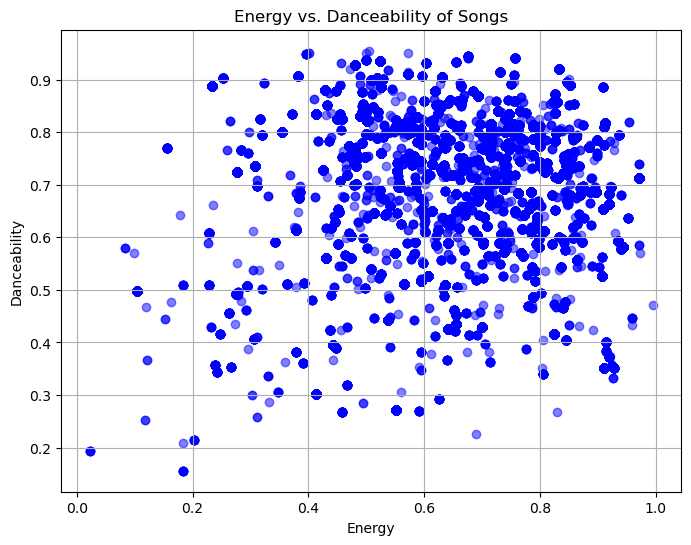

In [14]:
# Select the columns of interest
energy_danceability = spotify_filtered[['Energy', 'Danceability']]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(energy_danceability['Energy'], energy_danceability['Danceability'], color='blue', alpha=0.5)
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.title('Energy vs. Danceability of Songs')
plt.grid(True)
plt.show()

# Song Characteristics Distribution <a id="song-characteristics-distribution"></a>
**Question:** What is the distribution of various song characteristics?

* **Columns:** 'Loudness', 'Speechiness', 'Valence'
* **Plot:** Histograms or KDE plots showcasing the distribution.

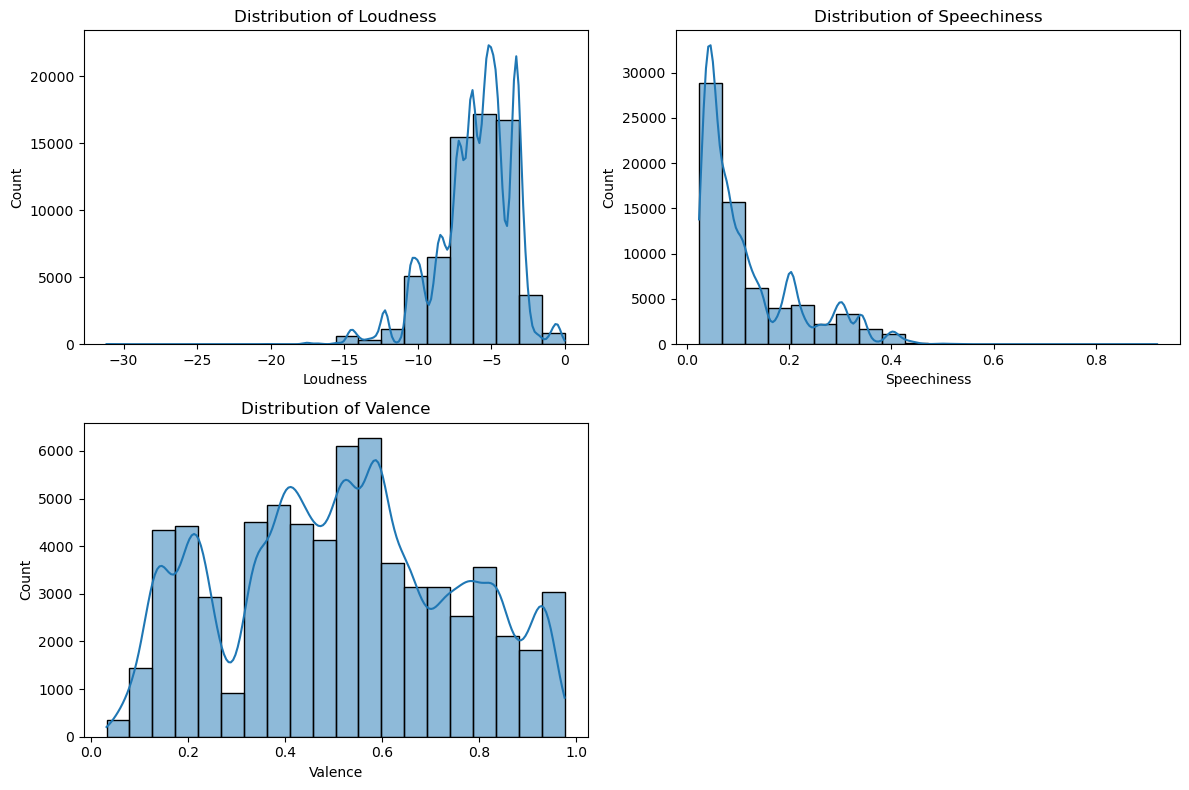

In [15]:
# Select the columns of interest
song_characteristics = spotify_filtered[['Loudness', 'Speechiness', 'Valence']]

# Create histograms or KDE plots
plt.figure(figsize=(12, 8))

# Histograms
plt.subplot(2, 2, 1)
sns.histplot(data=song_characteristics, x='Loudness', bins=20, kde=True)
plt.title('Distribution of Loudness')

plt.subplot(2, 2, 2)
sns.histplot(data=song_characteristics, x='Speechiness', bins=20, kde=True)
plt.title('Distribution of Speechiness')

plt.subplot(2, 2, 3)
sns.histplot(data=song_characteristics, x='Valence', bins=20, kde=True)
plt.title('Distribution of Valence')

plt.tight_layout()
plt.show()

# Nationality Distribution and Points <a id="nationality-distribution-and-points"></a>

**Question:** How does the nationality of artists relate to their total points?
* **Columns:** 'Nationality', 'Points (Total)'
* **Plot:** Box Plot or Violin Plot

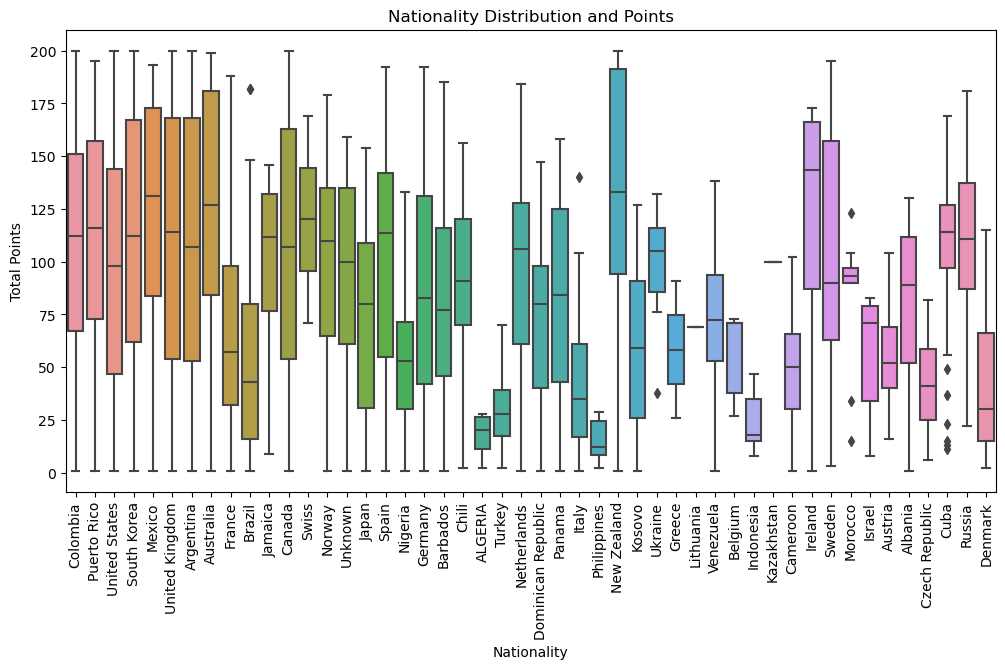

In [18]:
# Create a Box Plot or Violin Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=spotify_filtered, x='Nationality', y='Points (Total)')
plt.title('Nationality Distribution and Points')
plt.xlabel('Nationality')
plt.ylabel('Total Points')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Continent-wise Song Characteristics <a id="continent-wise-song-characteristics"></a>

**Question:** How do song characteristics vary across different continents?
* **Columns:** 'Continent', 'Danceability', 'Energy', 'Valence', etc.
* **Plot:** Box Plot or Heatmap

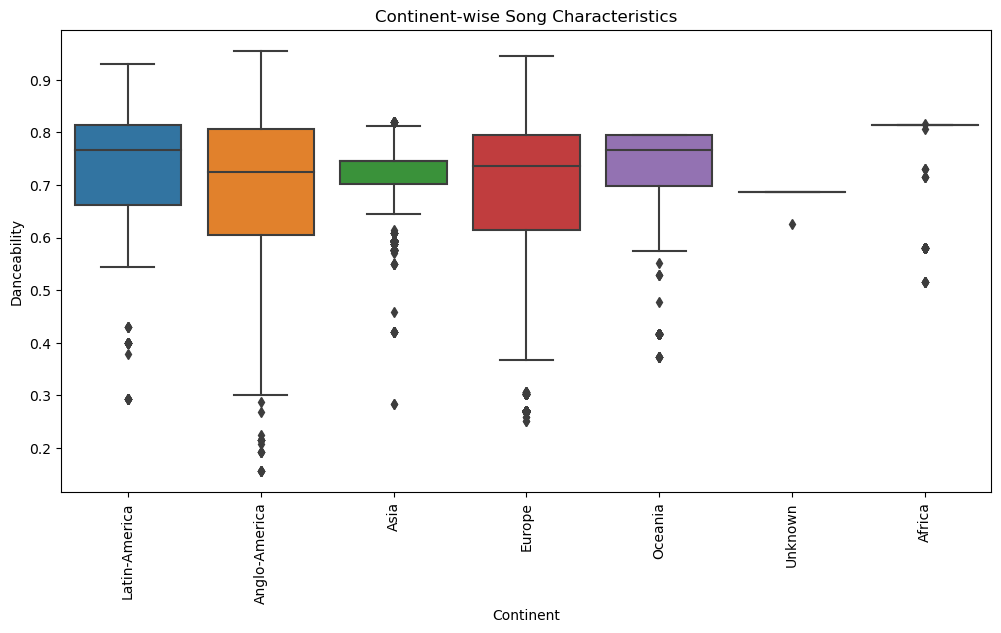

In [20]:

# Select columns for analysis
characteristics_cols = ['Danceability', 'Energy', 'Valence']  # Add more if needed

# Create a Box Plot or Heatmap
plt.figure(figsize=(12, 6))
sns.boxplot(data=spotify_filtered, x='Continent', y=characteristics_cols[0])
plt.title('Continent-wise Song Characteristics')
plt.xlabel('Continent')
plt.ylabel(characteristics_cols[0])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Correlation Matrix <a id="correlation-matrix"></a>

**Question:** Are there any correlations between song characteristics and points?
* **Columns:** Numeric song characteristics and 'Points (Total)'
* **Plot:** Heatmap of the correlation matrix

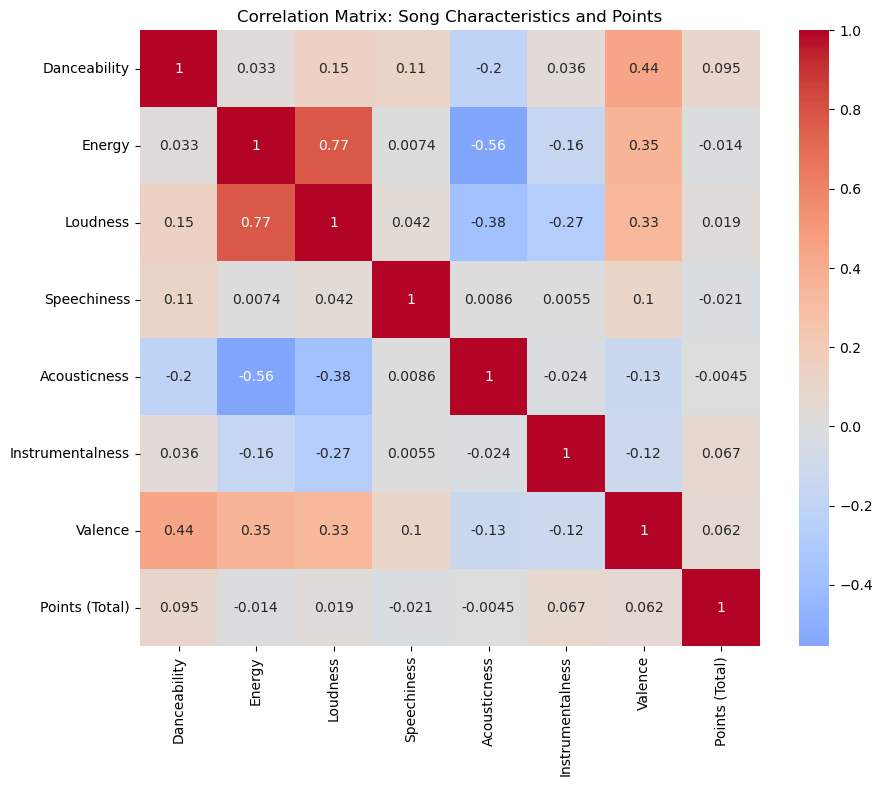

In [21]:
# Select numeric columns for correlation analysis
numeric_cols = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
                'Instrumentalness', 'Valence', 'Points (Total)']

# Calculate the correlation matrix
correlation_matrix = spotify_filtered[numeric_cols].corr()

# Create a Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix: Song Characteristics and Points')
plt.show()

# Song Characteristics Over Time <a id="song-characteristics-over-time"></a>

**Question:** How have song characteristics like energy and valence changed over time?
* **Columns:** 'Date', 'Energy', 'Valence'
* **Plot:** Line Plot or Area Plot

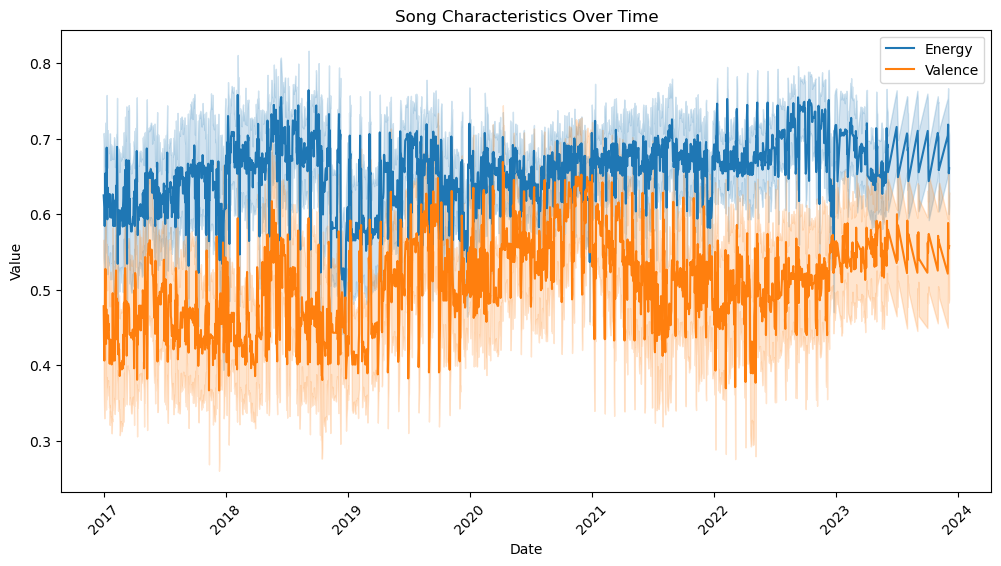

In [22]:
# Convert 'Date' column to datetime format
spotify_filtered['Date'] = pd.to_datetime(spotify_filtered['Date'])

# Select columns for analysis
time_characteristics_cols = ['Energy', 'Valence']  # Add more if needed

# Create Line Plot or Area Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=spotify_filtered, x='Date', y=time_characteristics_cols[0], label=time_characteristics_cols[0])
sns.lineplot(data=spotify_filtered, x='Date', y=time_characteristics_cols[1], label=time_characteristics_cols[1])
plt.title('Song Characteristics Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Artist and Nationality Points  <a id="artist-and-nationalist-points"></a>

**Question:** What is the relationship between artist points and their nationality points?
* **Columns:** 'Points (Ind for each Artist/Nat)', '# of Artist', '# of Nationality'
* **Plot:** Scatter Plot or Regression Plot

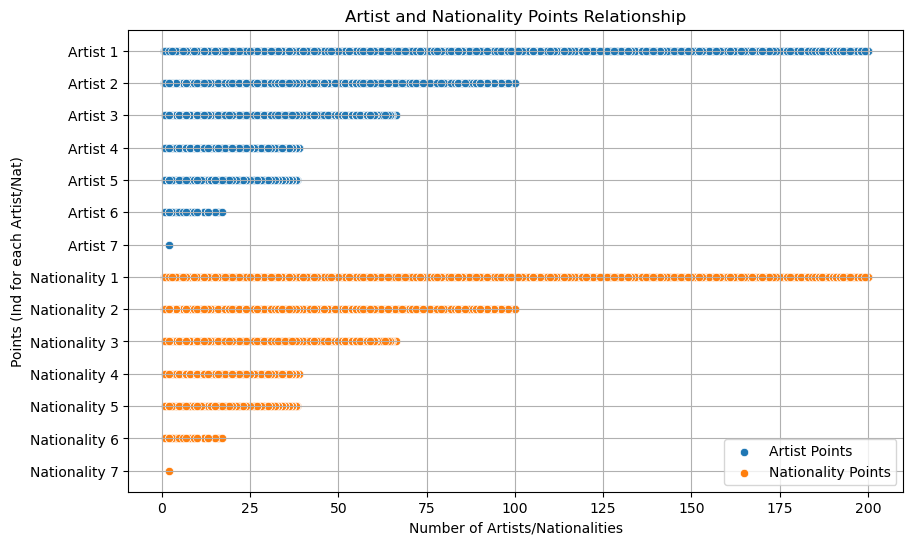

In [23]:
# Select columns for analysis
points_cols = ['Points (Ind for each Artist/Nat)', '# of Artist', '# of Nationality']

# Create Scatter Plot or Regression Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify_filtered, x=points_cols[0], y=points_cols[1], label='Artist Points')
sns.scatterplot(data=spotify_filtered, x=points_cols[0], y=points_cols[2], label='Nationality Points')
plt.title('Artist and Nationality Points Relationship')
plt.xlabel('Number of Artists/Nationalities')
plt.ylabel('Points (Ind for each Artist/Nat)')
plt.legend()
plt.grid()
plt.show()

# Song Characteristics vs. Artist Points <a id="song-characteristics-artist-points"></a>

**Question:** How do song characteristics relate to artist points?
* **Columns:** 'Energy', 'Danceability', 'Valence', 'Points (Ind for each Artist/Nat)'
* **Plot:** Scatter Matrix or Pair Plot

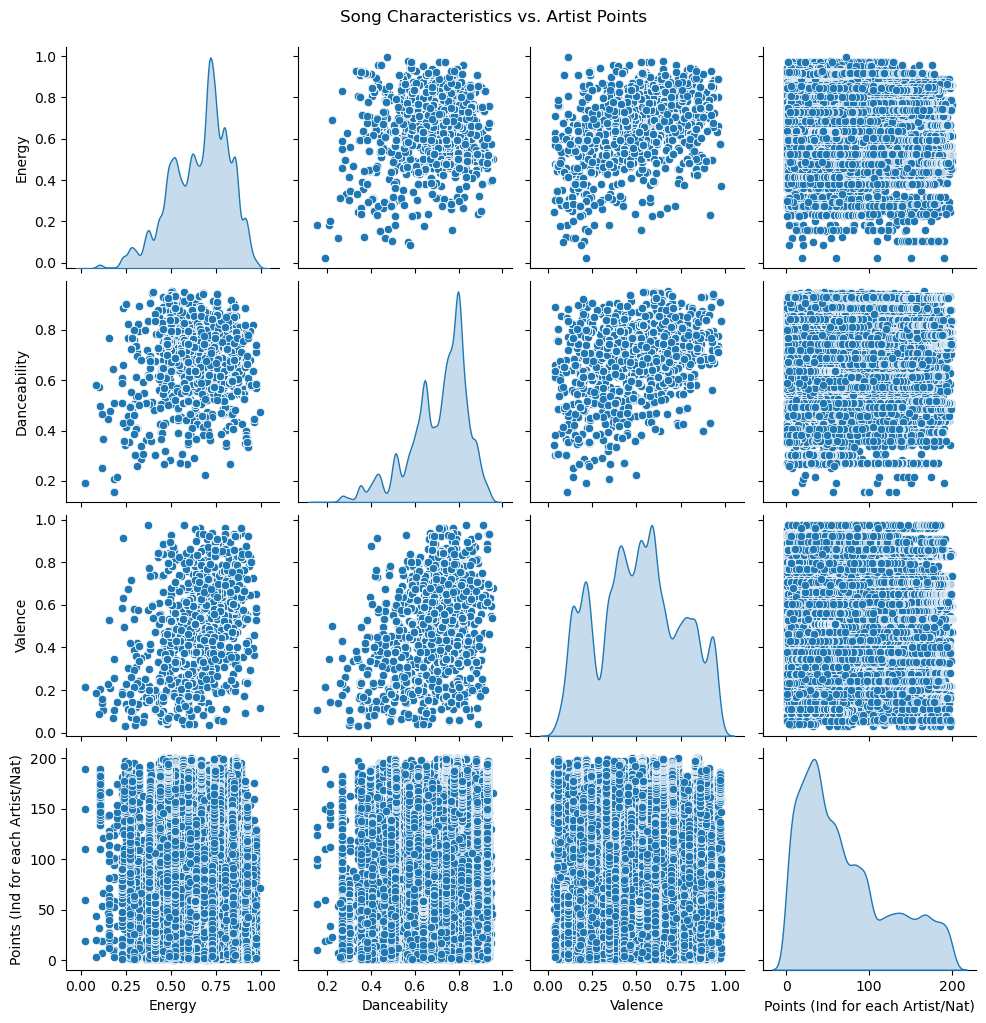

In [24]:
# Select columns for analysis
characteristics_cols = ['Energy', 'Danceability', 'Valence', 'Points (Ind for each Artist/Nat)']

# Create Pair Plot
sns.pairplot(data=spotify_filtered[characteristics_cols], diag_kind='kde')
plt.suptitle('Song Characteristics vs. Artist Points', y=1.02)
plt.show()

# Top Songs by Points <a id="top-songs-points"></a>

**Question:** What are the top songs based on their total points?
* **Columns:** 'Title', 'Points (Total)'
* **Plot:** Bar Plot (Top N songs and their points)

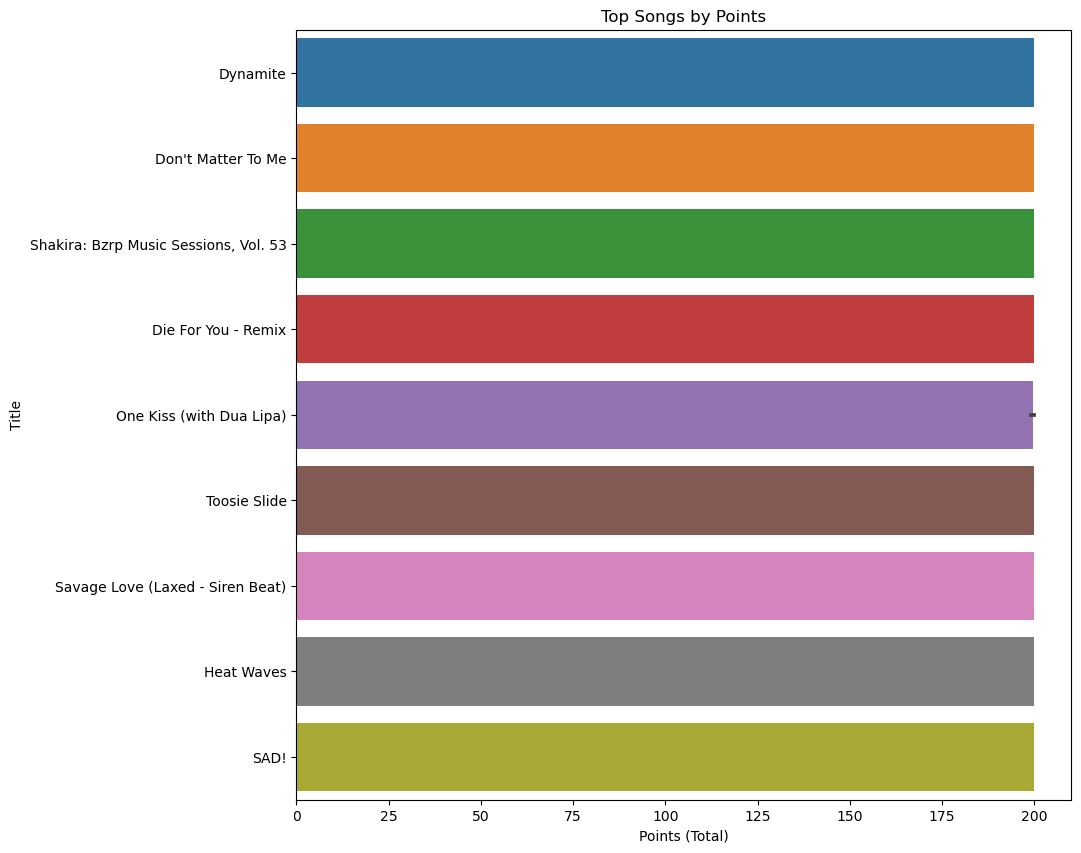

In [25]:
# Assuming spotify_filtered is your DataFrame
spotify_filtered = spotify_filtered.drop_duplicates(subset=['Title', 'Points (Total)'], keep='first')

# Select columns for analysis
top_songs = spotify_filtered[['Title', 'Points (Total)']].sort_values('Points (Total)', ascending=False).head(10)

# Create Bar Plot with adjusted plot size
plt.figure(figsize=(10, 10))  # Adjust the figsize according to your preference
sns.barplot(data=top_songs, x='Points (Total)', y='Title')
plt.title('Top Songs by Points')
plt.xlabel('Points (Total)')
plt.ylabel('Title')
plt.show()

# Summary <a name="summary"></a>

`Title: Exploring Music Characteristics and Artist Points`

* In this exploratory data analysis (EDA), we delved into a music dataset containing information about various songs, including attributes such as danceability, energy, loudness, and more, along with artist-related data such as points and nationality. Our aim was to gain insights into the relationships between song characteristics, artist points, and other attributes.

* We began by identifying the top artists and their popular songs, showcasing a clear picture of the most influential musical acts based on total points. We then explored the potential relationship between energy and danceability of songs, which highlighted how these two attributes interact. 

* Moving on, we delved into the distribution of song characteristics like loudness, speechiness, and valence, providing an understanding of the variety and prevalence of these features. We addressed issues of missing or extreme data points, ensuring the dataset's integrity.

* Examining nationality and artist points, we revealed the differences in artist performance based on their respective nationalities. This analysis shed light on potential patterns or disparities among artists from different countries.

* We broadened our exploration by analyzing how song characteristics vary across continents, providing insights into musical preferences across different regions. A comprehensive correlation matrix highlighted the relationships between song attributes and points, offering an understanding of potential influential factors.

* Temporal trends were also explored, showcasing how song characteristics such as energy and valence have evolved over time. Lastly, we examined the interaction between artist and nationality points, giving us insights into potential connections between these two aspects.

* This EDA journey helped us uncover intriguing patterns and relationships within the music dataset, shedding light on the complex interplay between song characteristics, artist points, and other attributes. The visualizations and analyses presented provide valuable insights for researchers, music enthusiasts, and analysts interested in understanding the dynamics of the music industry.

# Additional Resources <a name="additional-resources"></a>
* Spotify Kaggle Dataset:- https://www.kaggle.com/datasets/brunoalarcon123/top-200-spotify-songs-dataset
* Seaborn Documentation:- https://seaborn.pydata.org/tutorial/introduction
* Pandas Documentation:- https://pandas.pydata.org/docs/user_guide/index.html

We hope this documentation provides you with both educational value and an immersive experience into the harmonious intersection of music and data. Happy exploring!

`Note`: The content above is for illustrative purposes and should be customized based on the actual dataset and analysis.